In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
import glob

/tmp/ipykernel_2054831/2041886258.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
plt.style.use('ggplot')

In [11]:
ROOT_RETINEX = '/home/mzieba/Biometrics/arcface-pytorch/noise/retinex'
ROOT_NORMAL = '/home/mzieba/Biometrics/arcface-pytorch/noise/normal'
ROOT_RETINEX_R = 'test_results/retinex_r/'

In [12]:
dfs_retinex = {os.path.basename(p).split('.csv')[0]: pd.read_csv(p).sort_values(by='threshold').reset_index(drop=True) for p in glob.glob(os.path.join(ROOT_RETINEX, '*')) if 'csv' in p}
dfs_normal = {os.path.basename(p).split('.csv')[0]: pd.read_csv(p).sort_values(by='threshold').reset_index(drop=True) for p in glob.glob(os.path.join(ROOT_NORMAL, '*')) if 'csv' in p}
dfs_retinex_r = {os.path.basename(p).split('.csv')[0]: pd.read_csv(p).sort_values(by='threshold').reset_index(drop=True) for p in glob.glob(os.path.join(ROOT_RETINEX_R, '*')) if 'csv' in p}

In [13]:
x = dfs_retinex['resnet_18_retinex_weak_test_normal']

In [6]:
dfs_normal.keys()

dict_keys([])

In [7]:
for p in ['fpr', 'fnr', 'accuracy', 'f1_score']:
    sns.lineplot(data=x, x='threshold', y=p, label=p)

plt.legend()
plt.show()

NameError: name 'x' is not defined

# Normalne wyniki

In [188]:
retinex_strong = dfs_retinex['resnet_18_retinex_weak_test_normal']
retinex_weak = dfs_retinex['resnet_18_retinex_strong_test_normal']

In [194]:
normal_strong = dfs_normal['resnet_18_weak_test_normal']
normal_weak = dfs_normal['resnet_18_strong_test_normal']

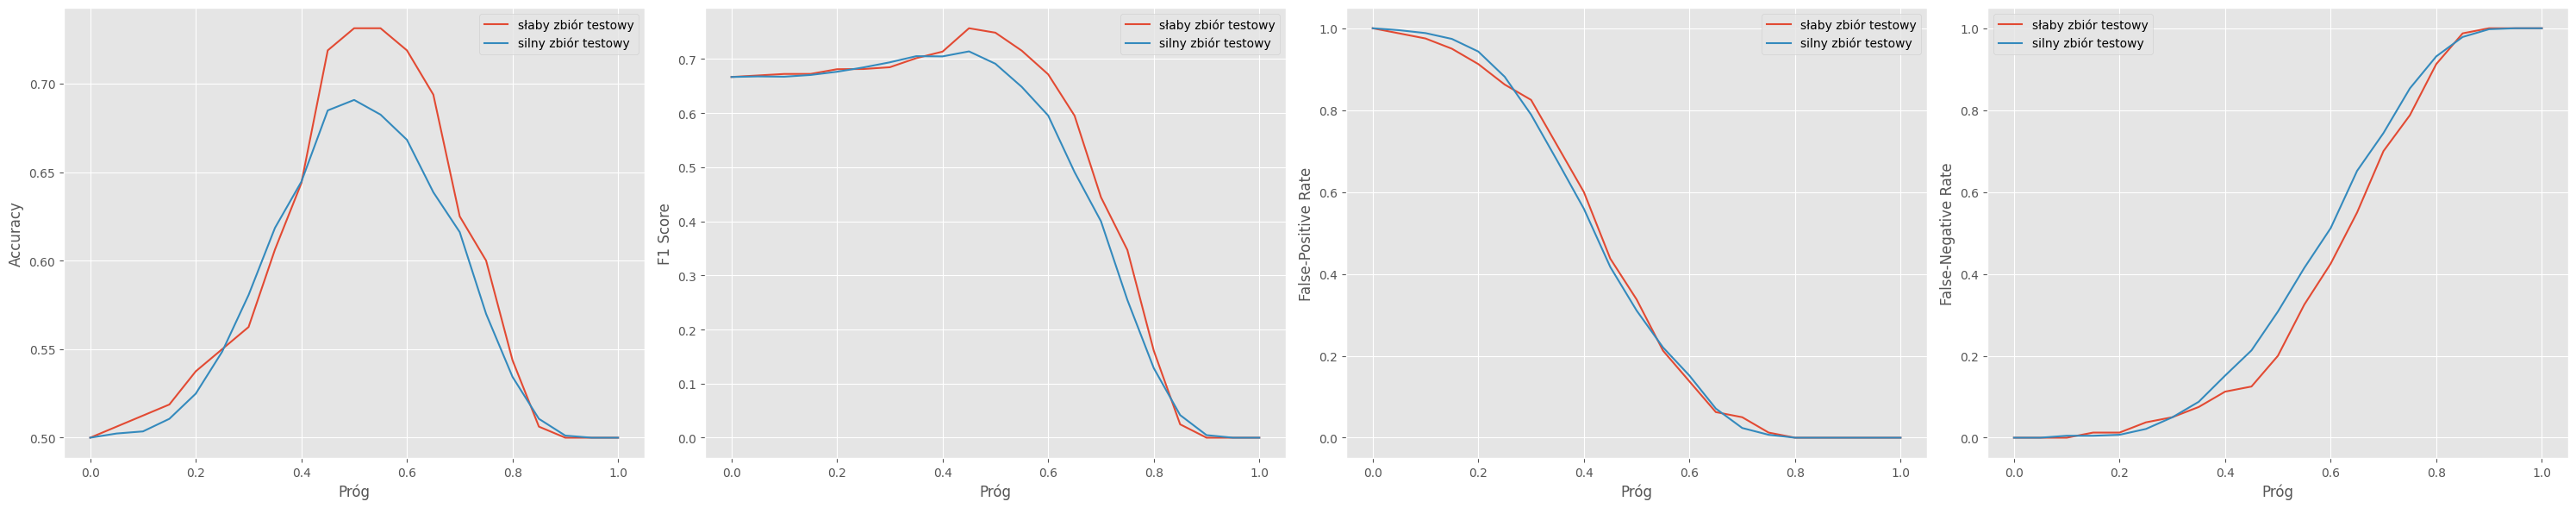

In [189]:
fig, ax = plt.subplots(1, 4, figsize=(30, 6))

sns.lineplot(retinex_weak, x='threshold', y='accuracy', ax=ax[0], label='słaby zbiór testowy')
sns.lineplot(retinex_strong, x='threshold', y='accuracy', ax=ax[0], label='silny zbiór testowy')
ax[0].set_xlabel('Próg')
ax[0].set_ylabel('Accuracy')

sns.lineplot(retinex_weak, x='threshold', y='f1_score', ax=ax[1], label='słaby zbiór testowy')
sns.lineplot(retinex_strong, x='threshold', y='f1_score', ax=ax[1], label='silny zbiór testowy')
ax[1].set_xlabel('Próg')
ax[1].set_ylabel('F1 Score')


sns.lineplot(retinex_weak, x='threshold', y='fpr', ax=ax[2], label='słaby zbiór testowy')
sns.lineplot(retinex_strong, x='threshold', y='fpr', ax=ax[2], label='silny zbiór testowy')
ax[2].set_xlabel('Próg')
ax[2].set_ylabel('False-Positive Rate')


sns.lineplot(retinex_weak, x='threshold', y='fnr', ax=ax[3], label='słaby zbiór testowy')
sns.lineplot(retinex_strong, x='threshold', y='fnr', ax=ax[3], label='silny zbiór testowy')
ax[3].set_xlabel('Próg')
ax[3].set_ylabel('False-Negative Rate')

plt.tight_layout()
plt.savefig('results_retinex.png')
plt.show()

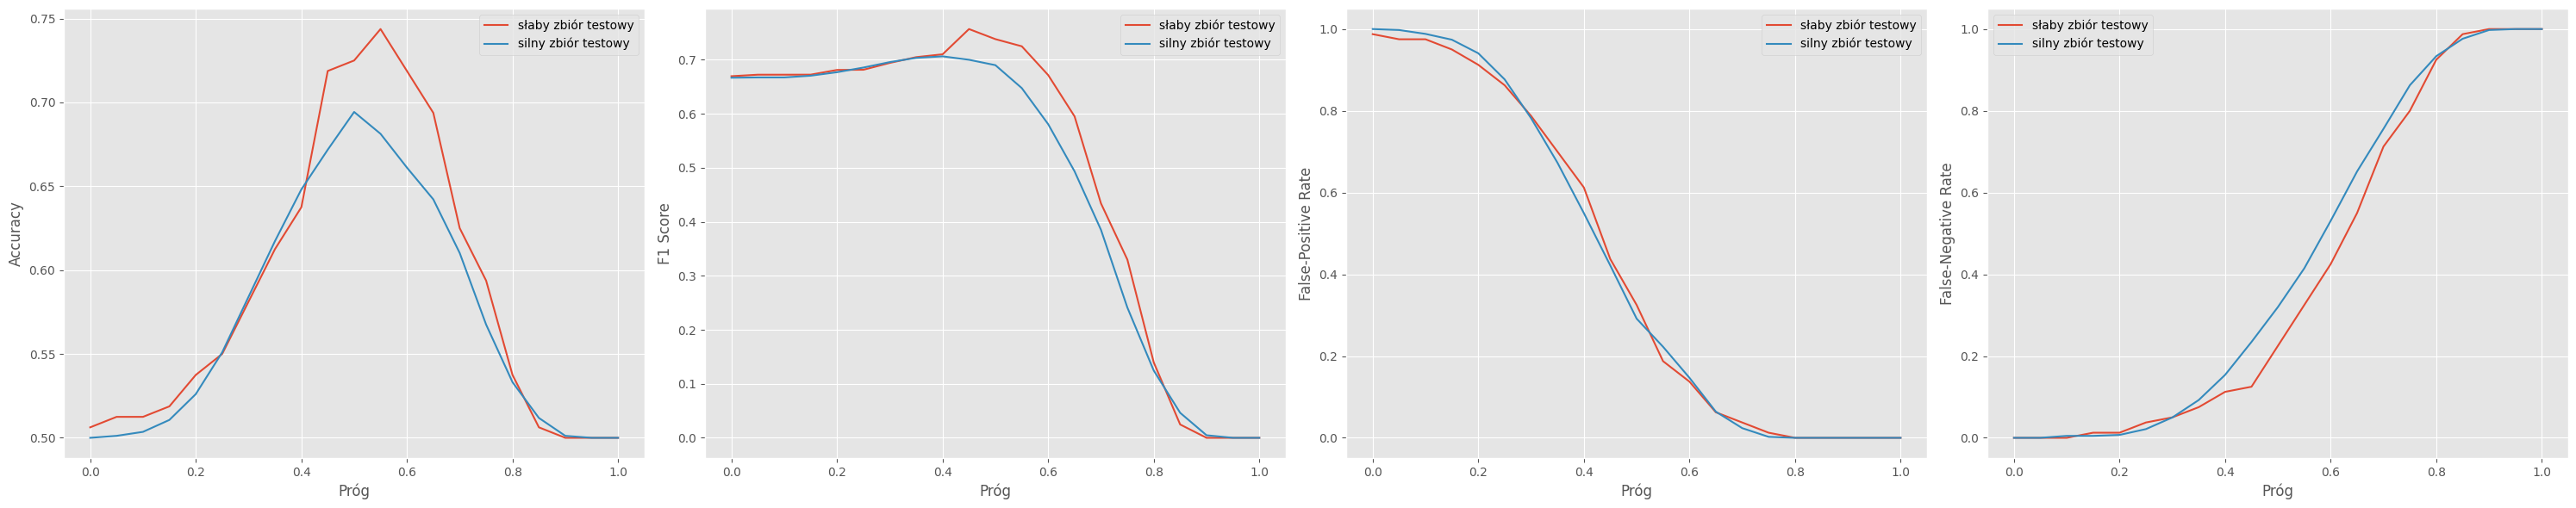

In [195]:
fig, ax = plt.subplots(1, 4, figsize=(30, 6))

sns.lineplot(normal_weak, x='threshold', y='accuracy', ax=ax[0], label='słaby zbiór testowy')
sns.lineplot(normal_strong, x='threshold', y='accuracy', ax=ax[0], label='silny zbiór testowy')
ax[0].set_xlabel('Próg')
ax[0].set_ylabel('Accuracy')

sns.lineplot(normal_weak, x='threshold', y='f1_score', ax=ax[1], label='słaby zbiór testowy')
sns.lineplot(normal_strong, x='threshold', y='f1_score', ax=ax[1], label='silny zbiór testowy')
ax[1].set_xlabel('Próg')
ax[1].set_ylabel('F1 Score')


sns.lineplot(normal_weak, x='threshold', y='fpr', ax=ax[2], label='słaby zbiór testowy')
sns.lineplot(normal_strong, x='threshold', y='fpr', ax=ax[2], label='silny zbiór testowy')
ax[2].set_xlabel('Próg')
ax[2].set_ylabel('False-Positive Rate')


sns.lineplot(normal_weak, x='threshold', y='fnr', ax=ax[3], label='słaby zbiór testowy')
sns.lineplot(normal_strong, x='threshold', y='fnr', ax=ax[3], label='silny zbiór testowy')
ax[3].set_xlabel('Próg')
ax[3].set_ylabel('False-Negative Rate')

plt.tight_layout()
plt.savefig('results_normal.png')
plt.show()

In [205]:
merge = retinex_strong.merge(normal_strong, on='threshold').drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y'])
for c in merge.columns:
    merge[c] = merge[c].apply(lambda x: round(x, 2))
print(merge.groupby(by='threshold').sum().to_latex().replace('0000', ''))

\begin{tabular}{lrrrrrrrr}
\toprule
 & accuracy_x & f1_score_x & fpr_x & fnr_x & accuracy_y & f1_score_y & fpr_y & fnr_y \\
threshold &  &  &  &  &  &  &  &  \\
\midrule
0.00 & 0.50 & 0.67 & 1.00 & 0.00 & 0.50 & 0.67 & 1.00 & 0.00 \\
0.05 & 0.50 & 0.67 & 1.00 & 0.00 & 0.50 & 0.67 & 1.00 & 0.00 \\
0.10 & 0.50 & 0.67 & 0.99 & 0.00 & 0.50 & 0.67 & 0.99 & 0.00 \\
0.15 & 0.51 & 0.67 & 0.97 & 0.00 & 0.51 & 0.67 & 0.97 & 0.00 \\
0.20 & 0.52 & 0.68 & 0.94 & 0.01 & 0.53 & 0.68 & 0.94 & 0.01 \\
0.25 & 0.55 & 0.68 & 0.88 & 0.02 & 0.55 & 0.69 & 0.88 & 0.02 \\
0.30 & 0.58 & 0.69 & 0.79 & 0.05 & 0.58 & 0.70 & 0.78 & 0.05 \\
0.35 & 0.62 & 0.71 & 0.68 & 0.09 & 0.62 & 0.70 & 0.67 & 0.09 \\
0.40 & 0.64 & 0.70 & 0.56 & 0.15 & 0.65 & 0.71 & 0.55 & 0.15 \\
0.45 & 0.68 & 0.71 & 0.42 & 0.21 & 0.67 & 0.70 & 0.42 & 0.23 \\
0.50 & 0.69 & 0.69 & 0.31 & 0.31 & 0.69 & 0.69 & 0.29 & 0.32 \\
0.55 & 0.68 & 0.65 & 0.22 & 0.41 & 0.68 & 0.65 & 0.22 & 0.41 \\
0.60 & 0.67 & 0.60 & 0.15 & 0.51 & 0.66 & 0.58 & 0.15 & 0.53 \

In [207]:
merge = retinex_weak.merge(normal_weak, on='threshold').drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y'])
for c in merge.columns:
    merge[c] = merge[c].apply(lambda x: round(x, 2))
print(merge.groupby(by='threshold').sum().to_latex().replace('0000', ''))

\begin{tabular}{lrrrrrrrr}
\toprule
 & accuracy_x & f1_score_x & fpr_x & fnr_x & accuracy_y & f1_score_y & fpr_y & fnr_y \\
threshold &  &  &  &  &  &  &  &  \\
\midrule
0.00 & 0.50 & 0.67 & 1.00 & 0.00 & 0.51 & 0.67 & 0.99 & 0.00 \\
0.05 & 0.51 & 0.67 & 0.99 & 0.00 & 0.51 & 0.67 & 0.97 & 0.00 \\
0.10 & 0.51 & 0.67 & 0.97 & 0.00 & 0.51 & 0.67 & 0.97 & 0.00 \\
0.15 & 0.52 & 0.67 & 0.95 & 0.01 & 0.52 & 0.67 & 0.95 & 0.01 \\
0.20 & 0.54 & 0.68 & 0.91 & 0.01 & 0.54 & 0.68 & 0.91 & 0.01 \\
0.25 & 0.55 & 0.68 & 0.86 & 0.04 & 0.55 & 0.68 & 0.86 & 0.04 \\
0.30 & 0.56 & 0.68 & 0.82 & 0.05 & 0.58 & 0.69 & 0.79 & 0.05 \\
0.35 & 0.61 & 0.70 & 0.71 & 0.07 & 0.61 & 0.70 & 0.70 & 0.07 \\
0.40 & 0.64 & 0.71 & 0.60 & 0.11 & 0.64 & 0.71 & 0.61 & 0.11 \\
0.45 & 0.72 & 0.76 & 0.44 & 0.12 & 0.72 & 0.76 & 0.44 & 0.12 \\
0.50 & 0.73 & 0.75 & 0.34 & 0.20 & 0.72 & 0.74 & 0.33 & 0.23 \\
0.55 & 0.73 & 0.72 & 0.21 & 0.33 & 0.74 & 0.72 & 0.19 & 0.33 \\
0.60 & 0.72 & 0.67 & 0.14 & 0.42 & 0.72 & 0.67 & 0.14 & 0.42 \

# Szum

In [17]:
def create_noise(dfs):
    lumination = [k for k in dfs.keys() if 'PSNR' in k]
    weak, strong = [k for k in lumination if 'weak_test' in k], [k for k in lumination if 'strong_test' in k]

    result = {
        'accuracy': [],
        'f1_score': [],
        'method': [],
        'set': [],
        'best_threshold': []
    }

    
    for w in weak:
        df = dfs[w]
        idx = df['accuracy'].idxmax()

        best = df.iloc[idx]

        result['accuracy'] += [round(best.accuracy, 2)]
        result['f1_score'] += [round(best.f1_score, 2)]
        result['method'] += [float(w.split('PSNR_')[-1])]
        result['set'] += ['weak test']
        result['best_threshold'] +=  [round(best.threshold, 2)]

    for s in weak:
        df = dfs[s]
        idx = df['accuracy'].idxmax()

        best = df.iloc[idx]

        result['accuracy'] += [round(best.accuracy, 2)]
        result['f1_score'] += [round(best.f1_score, 2)]
        result['method'] += [float(s.split('PSNR_')[-1])]
        result['set'] += ['strong test']
        result['best_threshold'] +=  [round(best.threshold, 2)]

    return pd.DataFrame(result)

In [18]:
noise_ret = create_noise(dfs_retinex)
noise_n = create_noise(dfs_normal)

In [19]:
merg = pd.merge(noise_ret, noise_n, on=['method', 'set'])

In [20]:
p = merg[merg.set == 'strong test'][['accuracy_x', 'f1_score_x', 'best_threshold_x', 'method',
       'accuracy_y', 'f1_score_y', 'best_threshold_y']].groupby('method').sum().to_latex().replace('0000', '')
print(p)

\begin{tabular}{lrrrrrr}
\toprule
 & accuracy_x & f1_score_x & best_threshold_x & accuracy_y & f1_score_y & best_threshold_y \\
method &  &  &  &  &  &  \\
\midrule
0.10 & 0.69 & 0.69 & 0.50 & 0.70 & 0.69 & 0.50 \\
1.00 & 0.69 & 0.69 & 0.50 & 0.70 & 0.69 & 0.50 \\
10.00 & 0.67 & 0.63 & 0.60 & 0.68 & 0.65 & 0.60 \\
100.00 & 0.59 & 0.67 & 0.95 & 0.56 & 0.68 & 0.95 \\
1000.00 & 0.50 & 0.67 & 0.00 & 0.50 & 0.67 & 0.00 \\
\bottomrule
\end{tabular}



In [21]:
p = merg[merg.set == 'weak test'][['accuracy_x', 'f1_score_x', 'best_threshold_x', 'method',
       'accuracy_y', 'f1_score_y', 'best_threshold_y']].groupby('method').sum().to_latex().replace('0000', '')
print(p)

\begin{tabular}{lrrrrrr}
\toprule
 & accuracy_x & f1_score_x & best_threshold_x & accuracy_y & f1_score_y & best_threshold_y \\
method &  &  &  &  &  &  \\
\midrule
0.10 & 0.69 & 0.69 & 0.50 & 0.70 & 0.69 & 0.50 \\
1.00 & 0.69 & 0.69 & 0.50 & 0.70 & 0.69 & 0.50 \\
10.00 & 0.67 & 0.63 & 0.60 & 0.68 & 0.65 & 0.60 \\
100.00 & 0.59 & 0.67 & 0.95 & 0.56 & 0.68 & 0.95 \\
1000.00 & 0.50 & 0.67 & 0.00 & 0.50 & 0.67 & 0.00 \\
\bottomrule
\end{tabular}



# Luminacja

In [159]:
def create_lumination(dfs):
    lumination = [k for k in dfs.keys() if 'LUM' in k]
    weak, strong = [k for k in lumination if 'weak_test' in k], [k for k in lumination if 'strong_test' in k]

    result = {
        'accuracy': [],
        'f1_score': [],
        'method': [],
        'set': [],
        'best_threshold': []
    }

    
    for w in weak:
        df = dfs[w]
        idx = df['accuracy'].idxmax()

        best = df.iloc[idx]

        result['accuracy'] += [round(best.accuracy, 2)]
        result['f1_score'] += [round(best.f1_score, 2)]
        result['method'] += [w.split('LUM_')[-1]]
        result['set'] += ['weak test']
        result['best_threshold'] +=  [round(best.threshold, 2)]

    for s in weak:
        df = dfs[s]
        idx = df['accuracy'].idxmax()

        best = df.iloc[idx]

        result['accuracy'] += [round(best.accuracy, 2)]
        result['f1_score'] += [round(best.f1_score, 2)]
        result['method'] += [s.split('LUM_')[-1]]
        result['set'] += ['strong test']
        result['best_threshold'] +=  [round(best.threshold, 2)]

    return pd.DataFrame(result)

In [160]:
lum_ret = create_lumination(dfs_retinex)
lum_n = create_lumination(dfs_normal)

In [161]:
lum_ret

,accuracy,f1_score,method,set,best_threshold
0,0.69,0.66,square,weak test,0.6
1,0.68,0.69,linear_0.5,weak test,0.5
2,0.68,0.69,linear_0.6,weak test,0.5
3,0.68,0.69,linear_0.75,weak test,0.5
4,0.68,0.69,linear_1.33,weak test,0.5
5,0.68,0.69,linear_0.67,weak test,0.5
6,0.66,0.68,const_-100,weak test,0.6
7,0.66,0.68,const_-20,weak test,0.6
8,0.66,0.68,const_-10,weak test,0.6
9,0.68,0.69,const_30,weak test,0.5


In [162]:
merg = pd.merge(lum_ret, lum_n, on=['method', 'set'])

In [165]:
merg[merg.set == 'weak test']

,accuracy_x,f1_score_x,method,set,best_threshold_x,accuracy_y,f1_score_y,best_threshold_y
0,0.69,0.66,square,weak test,0.6,0.68,0.64,0.60
1,0.68,0.69,linear_0.5,weak test,0.5,0.69,0.67,0.55
2,0.68,0.69,linear_0.6,weak test,0.5,0.69,0.67,0.55
3,0.68,0.69,linear_0.75,weak test,0.5,0.69,0.67,0.55
4,0.68,0.69,linear_1.33,weak test,0.5,0.69,0.67,0.55
5,0.68,0.69,linear_0.67,weak test,0.5,0.69,0.67,0.55
6,0.66,0.68,const_-100,weak test,0.6,0.66,0.68,0.60
7,0.66,0.68,const_-20,weak test,0.6,0.66,0.68,0.60
8,0.66,0.68,const_-10,weak test,0.6,0.66,0.68,0.60
9,0.68,0.69,const_30,weak test,0.5,0.69,0.67,0.55


In [164]:
p = merg[merg.set == 'strong test'][['accuracy_x', 'f1_score_x', 'best_threshold_x', 'method',
       'accuracy_y', 'f1_score_y', 'best_threshold_y']].groupby('method').sum().to_latex().replace('0000', '')
print(p)

\begin{tabular}{lrrrrrr}
\toprule
 & accuracy_x & f1_score_x & best_threshold_x & accuracy_y & f1_score_y & best_threshold_y \\
method &  &  &  &  &  &  \\
\midrule
const_-10 & 0.66 & 0.68 & 0.60 & 0.66 & 0.68 & 0.60 \\
const_-100 & 0.66 & 0.68 & 0.60 & 0.66 & 0.68 & 0.60 \\
const_-20 & 0.66 & 0.68 & 0.60 & 0.66 & 0.68 & 0.60 \\
const_-255 & 0.66 & 0.68 & 0.60 & 0.66 & 0.68 & 0.60 \\
const_30 & 0.68 & 0.69 & 0.50 & 0.69 & 0.67 & 0.55 \\
linear_0.5 & 0.68 & 0.69 & 0.50 & 0.69 & 0.67 & 0.55 \\
linear_0.6 & 0.68 & 0.69 & 0.50 & 0.69 & 0.67 & 0.55 \\
linear_0.67 & 0.68 & 0.69 & 0.50 & 0.69 & 0.67 & 0.55 \\
linear_0.75 & 0.68 & 0.69 & 0.50 & 0.69 & 0.67 & 0.55 \\
linear_1.33 & 0.68 & 0.69 & 0.50 & 0.69 & 0.67 & 0.55 \\
square & 0.69 & 0.66 & 0.60 & 0.68 & 0.64 & 0.60 \\
\bottomrule
\end{tabular}



In [99]:
lum_n.groupby(by=['method', 'set']).sum()

accuracy  f1_score
method     set                            
const_-10  strong test  0.656398  0.676339
           weak test    0.656398  0.676339
const_-100 strong test  0.656398  0.676339
           weak test    0.656398  0.676339
const_-20  strong test  0.656398  0.676339
           weak test    0.656398  0.676339
const_-255 strong test  0.656398  0.676339
           weak test    0.656398  0.676339
const_30   strong test  0.688389  0.667509
           weak test    0.688389  0.667509
linear_0   strong test  0.688389  0.667509
           weak test    0.688389  0.667509
linear_1   strong test  0.688389  0.667509
           weak test    0.688389  0.667509
square     strong test  0.675355  0.635638
           weak test    0.675355  0.635638